# Sarcasm dataset

# Problem Statement :
Predicting if the sentences are sarcastic

# Technicalities used :

# pandas 
# numpy 
# tensorflow
# keras
# neural nets

In [1]:
import pandas as pd
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
## JUST FOR FUN: How you can split the words and remove special characters using re:
import re
for i in df['article_link']:
    article = re.split('[:/-''_]',i)
    list1 = list(article)

In [6]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

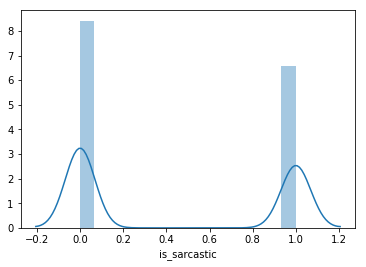

In [8]:
import seaborn as sns
sns.distplot(df['is_sarcastic'])

In [4]:
df.shape

(26709, 3)

In [5]:
df.dtypes

article_link    object
headline        object
is_sarcastic     int64
dtype: object

Just  for understanding, how u can split the joined words and and remove special characters
import re
for i in df['article_link']:
    result=re.split('[:/.-'']',i)
    a=pd.DataFrame(result)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['headline'])
word_index = tokenizer.word_index

In [10]:
print(len(word_index))

29656


In [11]:
sequences = tokenizer.texts_to_sequences(df['headline'])

In [17]:
sequences[0:20]

[[307, 15114, 678, 3336, 2297, 47, 381, 2575, 15115, 5, 2576, 8433],
 [3, 8434, 3337, 2745, 21, 1, 165, 8435, 415, 3111, 5, 257, 8, 1001],
 [144, 837, 1, 906, 1748, 2092, 581, 4718, 220, 142, 38, 45, 1, 10735],
 [1484, 35, 223, 399, 1, 1831, 28, 318, 21, 9, 2923, 1392, 6968, 967],
 [766, 718, 4719, 907, 10736, 622, 593, 4, 3, 94, 1308, 91],
 [10737, 3, 364, 72],
 [3, 6969, 350, 5, 460, 4273, 2194, 1485],
 [18, 478, 38, 1167, 30, 154, 1, 98, 82, 17, 157, 5, 31, 351],
 [248, 3622, 6970, 554, 5273, 1994, 140],
 [2093, 325, 346, 400, 59, 15116, 5, 3, 3895],
 [2924, 1679, 4720, 13, 36, 4274, 6971, 4, 2094, 1102],
 [285, 781, 461, 7, 1555, 1910, 8, 3623],
 [233, 513, 2925, 12, 8, 928, 225, 368, 1, 4275, 15117, 8436],
 [237, 3896, 8437, 3338, 37, 234, 15118, 5, 6, 172],
 [15119, 1393, 664, 650, 4, 326, 2, 1030],
 [533, 2094, 10738, 122, 10739, 5, 10740, 4721, 1911],
 [2577,
  1394,
  382,
  44,
  3897,
  347,
  318,
  1031,
  1,
  23,
  15120,
  19,
  1103,
  386,
  102,
  1309],
 [1680, 8438

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
padded = pad_sequences(sequences,padding='post')

In [49]:
padded

array([[  307, 15114,   678, ...,     0,     0,     0],
       [    3,  8434,  3337, ...,     0,     0,     0],
       [  144,   837,     1, ...,     0,     0,     0],
       ...,
       [10734,     8,    67, ...,     0,     0,     0],
       [ 1540,   391,  4163, ...,     0,     0,     0],
       [29655,  1646,     5, ...,     0,     0,     0]])

In [50]:
print(padded[2])

[  144   837     1   906  1748  2092   581  4718   220   142    38    45
     1 10735     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [51]:
print(padded.shape)

(26709, 40)


In [85]:
vocab_size =100000
embedding_dim =16
max_length = 40
trunc_type = 'post'
padding_type ='post'
oov_tok = '<OOV>'
training_size = 20000

In [86]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [87]:


model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length), #2d ARRAY or 3d
      tf.keras.layers.Flatten(),       # this converts our 3D feature maps to 1D feature vectors
      tf.keras.layers.Dense(6,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [88]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 16)            1600000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 3846      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 1,603,853
Trainable params: 1,603,853
Non-trainable params: 0
_________________________________________________________________


In [89]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(padded,df['is_sarcastic'],test_size=0.30,random_state = 0)

In [90]:
import numpy as np
xtrain= np.asarray(xtrain) 
ytrain = np.asarray(ytrain)

xtrain

array([[ 1162,  1800,  1050, ...,     0,     0,     0],
       [22431,  1499, 22432, ...,     0,     0,     0],
       [   48,    12,     1, ...,     0,     0,     0],
       ...,
       [ 3891, 13440,   553, ...,     0,     0,     0],
       [   18, 13626,  1439, ...,     0,     0,     0],
       [ 2146,  2997,  1338, ...,     0,     0,     0]])

In [91]:
ytrain.shape

(18696,)

In [93]:
history=model.fit(np.array(xtrain), np.array(ytrain), batch_size=32,
          epochs=20, verbose=1, validation_split=0.1)

Train on 16826 samples, validate on 1870 samples
Epoch 1/20
16826/16826 [==============================] - 18s 1ms/sample - loss: 4.4459e-04 - accuracy: 1.0000 - val_loss: 0.5450 - val_accuracy: 0.8594
Epoch 2/20
16826/16826 [==============================] - 19s 1ms/sample - loss: 2.9399e-04 - accuracy: 1.0000 - val_loss: 0.5659 - val_accuracy: 0.8583
Epoch 3/20
16826/16826 [==============================] - 19s 1ms/sample - loss: 2.0254e-04 - accuracy: 1.0000 - val_loss: 0.5841 - val_accuracy: 0.8583
Epoch 4/20
16826/16826 [==============================] - 19s 1ms/sample - loss: 1.4101e-04 - accuracy: 1.0000 - val_loss: 0.6020 - val_accuracy: 0.8583
Epoch 5/20
16826/16826 [==============================] - 19s 1ms/sample - loss: 1.0003e-04 - accuracy: 1.0000 - val_loss: 0.6205 - val_accuracy: 0.8583
Epoch 6/20
16826/16826 [==============================] - 20s 1ms/sample - loss: 7.1533e-05 - accuracy: 1.0000 - val_loss: 0.6382 - val_accuracy: 0.8578
Epoch 7/20
16826/16826 [=========

In [96]:
ypredict=model.predict(xtest)

In [99]:
ypredict

array([[9.99946237e-01],
       [8.27376842e-02],
       [1.00000000e+00],
       ...,
       [1.00000000e+00],
       [1.10745255e-07],
       [0.00000000e+00]], dtype=float32)

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,ypredict.round(),normalize=True)

0.8538624734805941

Got an accuracy of 85% which is a good accuracy score 